# Multiple linear regression relies on several key assumptions to produce valid and reliable results:
# 1. Linearity
# The relationship between the dependent variable and each independent variable is linear. This means the change in the dependent variable is proportional to the change in each independent variable.
# 2. Independence (I/P)
# The observations are independent of each other. This assumption ensures that the value of the dependent variable for one observation is not influenced by the value for another.
# 3. Homoscedasticity
# The variance of the residuals (errors) is constant across all levels of the independent variables. This means that the spread of residuals should be roughly the same for all predicted values.
# 4. Normality of Residuals
# The residuals
# (differences between observed and predicted values) are typically distributed. This is
# particularly important for hypothesis testing and constructing confidence intervals.
# 5. No Multicollinearity
# The independent variables are not too highly correlated. However, high multicollinearity can make it difficult to determine the individual effect of each independent variable.
# 6. No Autocorrelation
# There is no correlation between the residuals. Autocorrelation can indicate that the model is missing some crucial predictors.
# 7. Fixed Independent Variables
# The values of the independent variables are fixed in repeated samples, meaning they are measured without
# error.
# we will work on continouus data only in regression
# *********** 
# Collinearity: Remedies
# The next question would be to check which paii to include (VOL, SP), (VOL, HP), (WT, SP)
# 01 (WT, HP)
# • Subset Selection
# • Best Subset
# - Based on R2
# - Based on AIC

# AIC: 2p-21og/n/log(2) +logs2n+ 1])

# Model is good if residual mean=0

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as snf
import numpy as np

In [13]:
ND=pd.read_csv('Cars.csv')
ND

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [15]:
ND.shape

(81, 5)

In [17]:
ND.dtypes


HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [25]:
ND.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


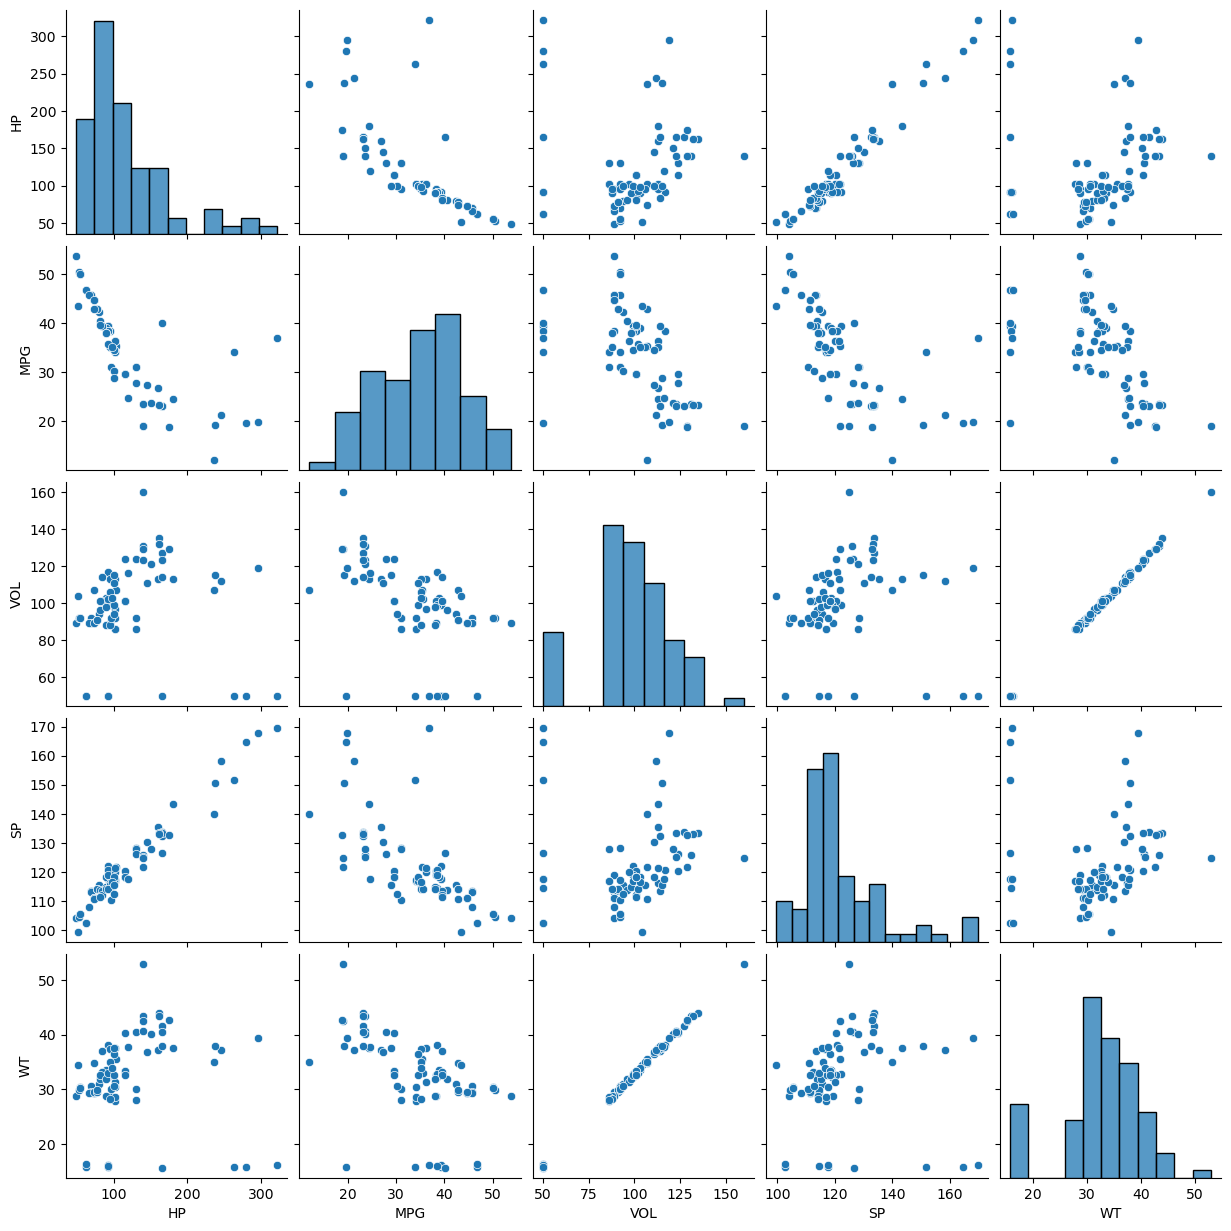

In [27]:
sns.pairplot(data=ND)

<Axes: >

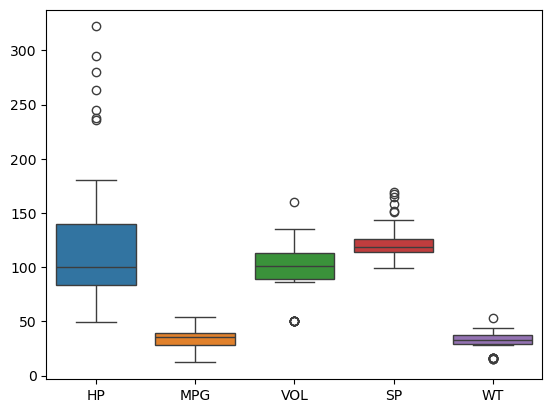

In [29]:
sns.boxplot(data=ND)

In [31]:
ND.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [56]:
model=snf.ols('MPG~HP+VOL+SP+WT',data=ND).fit()

In [40]:
model.pvalues 
# we will take p values whoch isless than  0.05

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

In [60]:
model=snf.ols('MPG~HP+VOL+SP',data=ND).fit() # we remmoved one colum WT 

In [44]:
model.pvalues # hear we can take all the values as the values are too small and its good for machine 


Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64

In [52]:
model=snf.ols('MPG~HP+SP+WT',data=ND).fit() # we remmoved one colum WT 
model.pvalues #as we can see vol and WT  are almost same so we can drop any one of them to predict....

Intercept    5.053995e-02
HP           7.560276e-07
SP           1.089096e-02
WT           1.914892e-13
dtype: float64

In [62]:
model.params

Intercept    29.923389
HP           -0.206705
VOL          -0.201651
SP            0.400659
dtype: float64